# Decision Tree
CHURN MODELLING DATA

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# The Data

In [3]:
df=pd.read_csv('D:/download/iAnalyst/datasets/Churn_Modelling.csv')

In [4]:
data=df.copy()
data

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# Data cleaning

In [5]:
to_drop=['RowNumber','CustomerId','Surname']
data=data.drop(to_drop,axis=1)
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
Gender

Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]

In [8]:
Geo = pd.get_dummies(data['Geography'],drop_first=True)
Geo

Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]

In [9]:
data.drop(['Geography','Gender'],axis=True,inplace=True)
#data

In [10]:
data=pd.concat([data,Gender,Geo],axis=1)
#data

In [11]:
data.shape

(10000, 12)

# Fitting a model


Train,Test,split up

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=data.drop('Exited',axis=1)
y=data['Exited']

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=110)

In [15]:
print(X_train,X_test,y_train,y_test)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
3663          724   31       5       0.00              1          1   
5754          714   45       9  106431.97              2          1   
5391          639   27       8  133806.54              2          1   
6731          503   32       4       0.00              2          1   
4489          602   35       8       0.00              2          1   
...           ...  ...     ...        ...            ...        ...   
6525          728   34       4  106328.08              1          1   
9487          850   32       5       0.00              1          1   
2109          596   41       5       0.00              2          0   
9955          714   29       4       0.00              2          1   
2176          699   35       2  167455.66              2          1   

      IsActiveMember  EstimatedSalary  Male  Germany  Spain  
3663               0        134889.95     1        0      0  
5754               1   

In [16]:
## Fit a Decision tree model as comparision

In [17]:
clf=DecisionTreeClassifier(min_samples_split=20)# max_Depth=6
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_pred
print(clf)
print(accuracy_score(y_test,y_pred))

DecisionTreeClassifier(min_samples_split=20)
0.8205


In [18]:
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1589
           1       0.57      0.49      0.53       411

    accuracy                           0.82      2000
   macro avg       0.72      0.70      0.71      2000
weighted avg       0.81      0.82      0.82      2000



In [19]:
roc_auc_score(y_test,y_pred)

0.6994444776206247

In [20]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
features=list(data.columns[data.columns!='Exited'])
features

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Male',
 'Germany',
 'Spain']

In [21]:
dot_data=StringIO()

In [22]:
export_graphviz(clf,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [28]:
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1589
           1       0.57      0.49      0.53       411

    accuracy                           0.82      2000
   macro avg       0.72      0.70      0.71      2000
weighted avg       0.81      0.82      0.82      2000



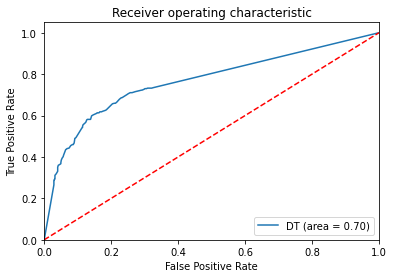

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DT_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DT (area = %0.2f)' % DT_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [31]:
clf.predict_proba(X_test)

array([[1.    , 0.    ],
       [0.    , 1.    ],
       [0.75  , 0.25  ],
       ...,
       [0.8125, 0.1875],
       [0.    , 1.    ],
       [1.    , 0.    ]])

In [32]:
len(data.columns)

12

# Fit a random forest model

In [33]:
clf=RandomForestClassifier(n_estimators=100,max_features=4, max_depth=10, min_samples_split=20)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.862

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1589
           1       0.79      0.44      0.57       411

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



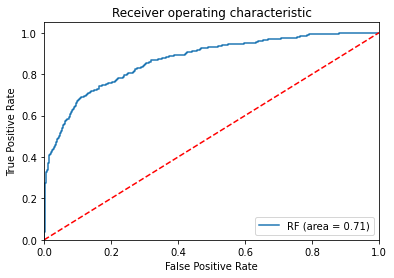

In [34]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
RF_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % RF_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Fitting a AdaBoost model

In [57]:
clf=AdaBoostClassifier(n_estimators=101,learning_rate=0.3)
clf.fit(X_train,y_train)


AdaBoostClassifier(learning_rate=0.3, n_estimators=101)

In [58]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
accuracy_score(y_test,y_pred)

0.858

In [70]:
print(classification_report(y_test,y_pred))
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Boost_roc_curve=roc_auc_score(y_test,clf.predict(X_test))
fpr,tpr,threshholds=roc_curve(y_test,clf.predict_proba(X_test)[:,1])
fpr,tpr,threshholds

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1589
           1       0.76      0.45      0.57       411

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.29326621e-04,
        6.29326621e-04, 6.29326621e-04, 6.29326621e-04, 6.29326621e-04,
        6.29326621e-04, 1.25865324e-03, 1.25865324e-03, 1.25865324e-03,
        1.25865324e-03, 1.88797986e-03, 1.88797986e-03, 2.51730648e-03,
        2.51730648e-03, 3.14663310e-03, 3.14663310e-03, 4.40528634e-03,
        4.40528634e-03, 4.40528634e-03, 5.03461296e-03, 5.03461296e-03,
        5.66393958e-03, 5.66393958e-03, 6.92259283e-03, 6.92259283e-03,
        7.55191945e-03, 7.55191945e-03, 8.18124607e-03, 8.18124607e-03,
        1.06985525e-02, 1.06985525e-02, 1.13278792e-02, 1.13278792e-02,
        1.19572058e-02, 1.19572058e-02, 1.19572058e-02, 1.19572058e-02,
        1.25865324e-02, 1.25865324e-02, 1.32158590e-02, 1.32158590e-02,
        1.38451857e-02, 1.38451857e-02, 1.44745123e-02, 1.44745123e-02,
        1.51038389e-02, 1.51038389e-02, 1.63624921e-02, 1.63624921e-02,
        1.69918188e-02, 1.69918188e-02, 1.76211454e-02, 1.762114

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1589
           1       0.76      0.45      0.57       411

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



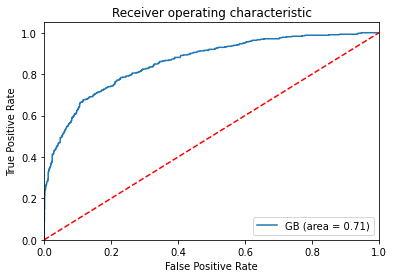

In [74]:
print(classification_report(y_test,y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
GB_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB (area = %0.2f)' % GB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [75]:
pd.DataFrame(X.columns, clf.feature_importances_).sort_index(0)

0
0.000000            Spain
0.009901           Tenure
0.009901        HasCrCard
0.059406             Male
0.059406          Germany
0.069307  EstimatedSalary
0.079208      CreditScore
0.079208   IsActiveMember
0.128713          Balance
0.207921    NumOfProducts
0.297030              Age

In [77]:
round(sum(clf.feature_importances_))

1